In [2]:
# -*- coding: utf-8 -*-


import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
from scipy import misc
from datetime import datetime
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.io import loadmat
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
import copy
from matplotlib import cm
from matplotlib.animation import FuncAnimation
import scipy.optimize
import networkx as nx
import os
from sklearn import svm
from scipy.spatial.distance import cdist
from scipy.cluster.hierarchy import fcluster
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist


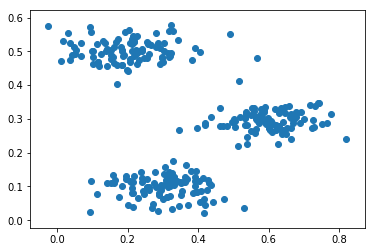

In [6]:

# task 3
# Реализуйте функцию вычисления матрицы ковариации данных.
def get_covariation_matrix(X):
    # averages of x1 and x2
    averages, _ = np.average(X, axis=1, returned=True)
    # normalize
    X -= averages[:, None]
    c = X.dot(X.T)
    return c.squeeze()


def get_task_data(path):
    data = loadmat(path)
    X = data["X"]
    X /= 10
    return X, X[:, 0], X[:, 1]

# task 1
# Загрузите данные ex7data1.mat из файла.
# task 2
# Постройте график загруженного набора данных.


data, xData, yData = get_task_data('G:/Labs/bsuir-labs/11cem/ml/lab07/data/ex7data1.mat')
plt.scatter(xData, yData)
plt.show()

In [7]:
# task 3
# Реализуйте функцию вычисления матрицы ковариации данных.

def get_covariation_matrix(X):
    # averages of x1 and x2
    averages, _ = np.average(X, axis=1, returned=True)
    # normalize
    X -= averages[:, None]
    c = X.dot(X.T)
    return c.squeeze()


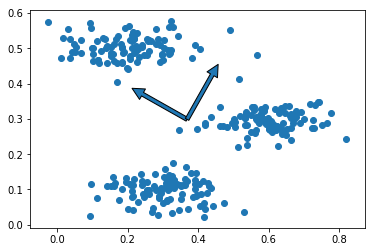

In [5]:
# normalizing
mu = data.mean(axis=0)
data = data - mu
# task 4
# Вычислите координаты собственных векторов для набора данных с помощью сингулярного разложения матрицы ковариации (разрешается использовать библиотечные реализации матричных разложений).
eigenvectors, _, _ = np.linalg.svd(data.T, full_matrices=False)

projected_data = np.dot(data, eigenvectors)
sigma = projected_data.std(axis=0).mean()
plt.scatter(xData, yData)
for vector in eigenvectors:
    start, end = mu, mu + sigma * vector
    # task 5
    # Постройте на графике из пункта 2 собственные векторы матрицы ковариации.
    plt.annotate('', xy=end, xycoords='data', xytext=start, textcoords='data', arrowprops=dict())
plt.axis('equal')
plt.show()

In [8]:
# task 7
# Реализуйте функцию вычисления обратного преобразования.

def restore(X_reduced,X, vec, m, element_number=9):
    Xrestored = np.dot(X_reduced[element_number], vec) + m
    print('Restored: ', Xrestored)
    print('Original: ', X[:, element_number])

In [9]:
# task 6
# Реализуйте функцию проекции из пространства большей размерности в пространство меньшей размерности с помощью метода главных компонент.

# return vals
# x reduced features dataset
# restored x with losses
def PCA_m(X,x,y):
    Xcentered = (X[0] - x.mean(), X[1] - y.mean())
    m = (x.mean(), y.mean())
    covmat = get_covariation_matrix(Xcentered)
    _, vecs = np.linalg.eig(covmat)
    Xnew = np.dot(-vecs[:, 1], Xcentered)
    # example of restored x with losses
    restore(Xnew,X, -vecs[:, 1],m )
    return Xnew


_,x,y = get_task_data('G:/Labs/bsuir-labs/11cem/ml/lab07/data/ex7data1.mat')
X = np.vstack((x,y))
x_reduced = PCA_m(X,x,y)

Restored:  [0.42930653 0.40651784]
Original:  [0.29797039 0.48067108]


No handles with labels found to put in legend.


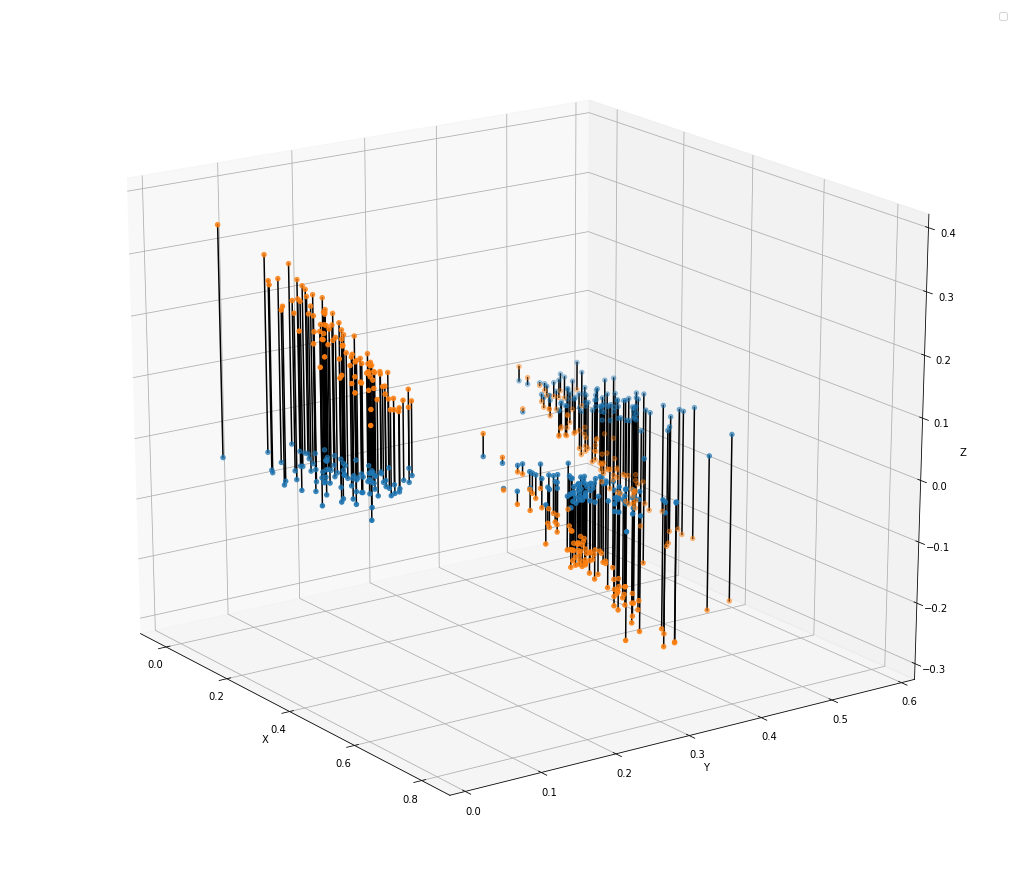

In [15]:
#task 8
# Постройте график исходных точек и их проекций на пространство меньшей размерности (с линиями проекций).



fig = plt.figure(figsize=(18, 16))
# ax = fig.add_subplot(111, projection='3d')

ax = fig.gca(projection='3d')


# Plot scatterplot data (20 2D points per colour) on the x and z axes.

# By using zdir='y', the y value of these points is fixed to the zs value 0
# and the (x,y) points are plotted on the x and z axes.
ax.scatter(x, y, zs=0)

ax.scatter(x, y, x_reduced)
for x_i, y_i, z_i in zip(x, y, x_reduced):
    ax.plot(np.array([x_i,x_i]),np.array([y_i,y_i]),np.array([0,z_i]), c="black")





# Make legend, set axes limits and labels
ax.legend()
# ax.set_xlim(0, 1)
# ax.set_ylim(0, 1)
# ax.set_zlim(0, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Customize the view angle so it's easier to see that the scatter points lie
# on the plane y=0
ax.view_init(elev=20., azim=-35)

plt.show()

In [16]:


def get_task_data(path):
    data = loadmat(path)
    X = data["X"]
    X += 128
    return X

# task 9
# Загрузите данные ex7faces.mat из файла.

data = get_task_data('G:/Labs/bsuir-labs/11cem/ml/lab07/data/ex7faces.mat')


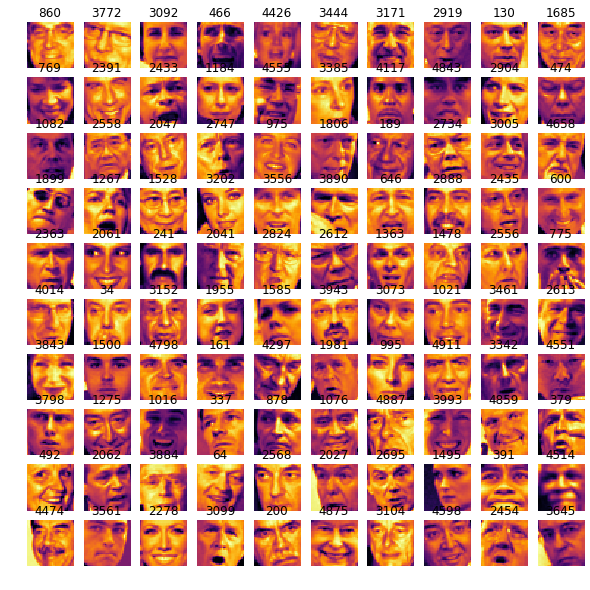

In [17]:
def show_data(data):
    meshx, meshy = np.meshgrid(np.arange(32), np.arange(32))
    fig, axs = plt.subplots(10, 10, figsize=(10, 10), sharey=True)
    np.random.seed(42)
    indexes = [np.random.randint(0, len(data)) for _ in range(len(data))]
    count = 0
    for i in range(10):
        for j in range(10):
            # axs[i][j].scatter(meshx, -(meshy - 32), c=data[indexes[count]].reshape((32, 32)).T, marker=",",
            #                   cmap="inferno")
            axs[i][j].imshow(data[indexes[count]].reshape((32, 32)).T, cmap='inferno')
            axs[i][j].axis("off")
            axs[i][j].title.set_text(str(indexes[count]))
            count += 1

    # task 10
    # Визуализируйте 100 случайных изображений из набора данных.
    plt.show()


show_data(data)

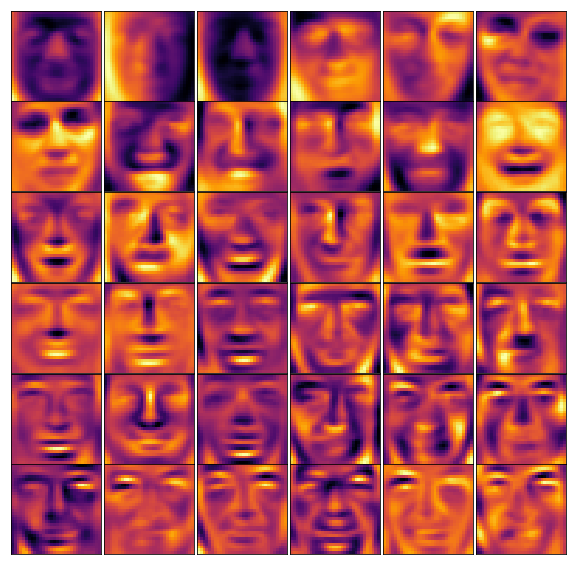

In [21]:
from sklearn.decomposition import PCA
import math

def get_my_vector(data):
    pca = PCA(n_components = 36)
    pca.fit_transform(data)

# task 11
# С помощью метода главных компонент вычислите собственные векторы.

def show_components(data,n ):
    pca = PCA(n_components = n)
    pca.fit(data)
    fig, axes = plt.subplots(int(n/math.sqrt(n)),int(n/math.sqrt(n)),figsize=(10,10), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.01, wspace=0.01))
    for i, ax in enumerate(axes.flat):
        ax.imshow(pca.components_[i].reshape(32,32).T,cmap='inferno')
    plt.show()

# task 12
# Визуализируйте 36 главных компонент с наибольшей дисперсией.
# task 13
# Как изменилось качество выбранных изображений?

show_components(data,36)

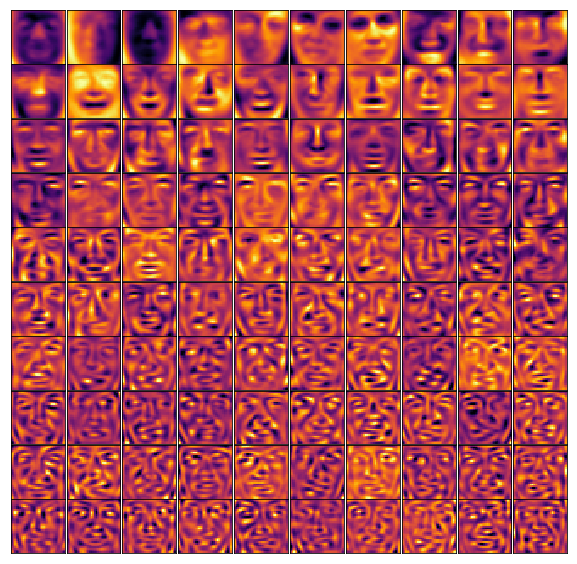

In [22]:
# task 14
# Визуализируйте 100 главных компонент с наибольшей дисперсией.
# task 15
# Как изменилось качество выбранных изображений?
show_components(data,100)

c:\users\harwister\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


(128, 128, 3)
[[221 186   0]
 [221 186   0]
 [221 186   0]
 ...
 [ 58  55   0]
 [ 58  55   0]
 [ 58  55   0]]


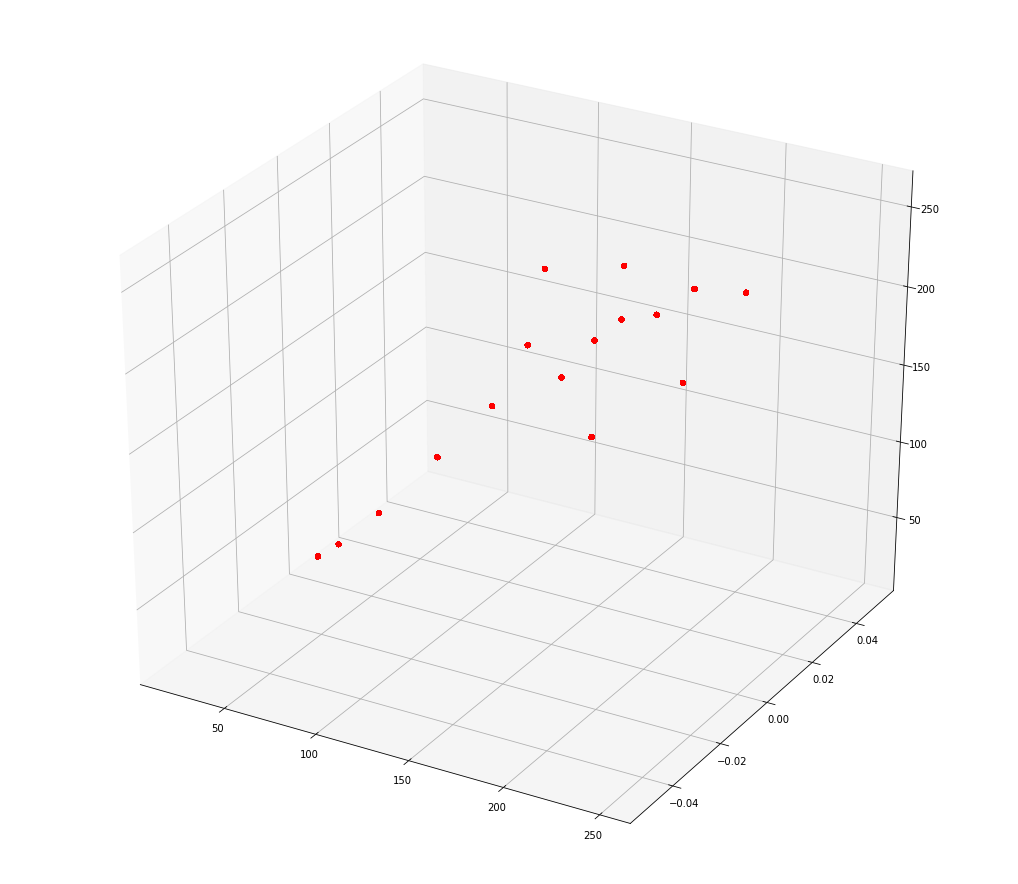

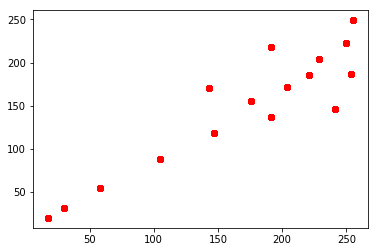

In [26]:
# task 16
# Используйте изображение, сжатое в лабораторной работе №6 (Кластеризация).
compressedImage = misc.imread('G:/Labs/bsuir-labs/11cem/ml/lab07/data/l6.png')
print(compressedImage.shape)

compressedImage = compressedImage.reshape(16384, 3)
print(compressedImage)

fig = plt.figure(figsize=(18, 16))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(compressedImage[:, 1], compressedImage[:, 2], compressedImage[:, 0], c='Red')


# task 17
# С помощью метода главных компонент визуализируйте данное изображение в 3D и 2D.
plt.show()
plt.plot(compressedImage[:, 0], compressedImage[:, 1], 'ro')
plt.show()
# Соответствует ли 2D изображение какой-либо из проекций в 3D?
# да